#### **Objective**

In this notebook, we will demonstrate working of `MLPClassifier` to classify handwritten digits in `MNIST` dataset.

#### **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_openml 
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix 

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedShuffleSplit

import warnings 
warnings.filterwarnings('ignore')

In [2]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=42)

#### **Loading the dataset**
Lets use the MNIST dataet for the demo of MLPClassifier.

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X = X.to_numpy()
y = y.to_numpy()

##### **Train test split**

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print('Shape of training data before flattening : ',X_train.shape)
print('Shape of testing data before flattening : ',X_test.shape)

Shape of training data before flattening :  (60000, 784)
Shape of testing data before flattening :  (10000, 784)


##### **Reshaping**

In [6]:
X_train = X_train.reshape(X_train.shape[0] ,28*28)
X_test = X_test.reshape(X_test.shape[0] ,28*28)

##### **Normalizing**

In [7]:
X_train = X_train / 255 
X_test = X_test / 255

print('Shape of training data after flattening : ',X_train.shape)
print('Shape of testing data after flattening : ',X_test.shape)

Shape of training data after flattening :  (60000, 784)
Shape of testing data after flattening :  (10000, 784)


In [8]:
print('Shape of training data : ',X_train.shape)
print('Shape of testing data : ', X_test.shape)
print('Shape of training labels : ',y_train.shape)
print('Shape of testing labels :', y_test.shape)

Shape of training data :  (60000, 784)
Shape of testing data :  (10000, 784)
Shape of training labels :  (60000,)
Shape of testing labels : (10000,)


### **Fit MLPClassifier on MNIST dataset**

Let us train a MLPClassifier with one hidden layer having 128 neurons. 

In [9]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [10]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(), cv=cv)
print('Training accuracy : {:.2f} %'.format(cv_score.mean() *100))

Training accuracy : 97.22 %


**Prediction probabilities on testing data**

In [11]:
mlpc.predict_proba(X_test[:5])

array([[2.37458014e-12, 1.42969538e-15, 7.42782257e-09, 2.07770573e-06,
        1.36965860e-21, 7.15259561e-15, 3.17157909e-21, 9.99997914e-01,
        1.79333277e-12, 4.13385362e-10],
       [4.34717050e-16, 2.60988954e-11, 1.00000000e+00, 4.20811110e-10,
        1.17613965e-30, 1.21997285e-14, 1.54206455e-14, 5.04768969e-31,
        4.16630006e-13, 6.09012814e-26],
       [2.92345224e-11, 9.99996191e-01, 2.87893448e-08, 2.58269590e-11,
        1.61243656e-08, 2.96121060e-09, 1.93673881e-09, 2.76282333e-08,
        3.73169140e-06, 7.71828261e-12],
       [9.99999961e-01, 2.08845641e-18, 1.88509402e-08, 3.71971203e-13,
        1.06326320e-13, 1.39581817e-12, 1.24417890e-10, 1.97907116e-08,
        3.48106592e-15, 4.12848473e-11],
       [9.00666687e-15, 1.34092540e-16, 1.30169831e-10, 2.31364539e-18,
        9.99949124e-01, 2.66617628e-16, 6.02472590e-13, 4.44053394e-11,
        2.62229605e-14, 5.08762712e-05]])

**Prediction of class labels of testing data**

In [12]:
y_pred = mlpc.predict(X_test)

In [13]:
print('Training accuracy : {:.2f}'.format(accuracy_score(y_train, mlpc.predict(X_train)) *100))

print('Testing accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred) *100))

Training accuracy : 100.00
Testing accuracy : 98.01


**Confusion Matrix**

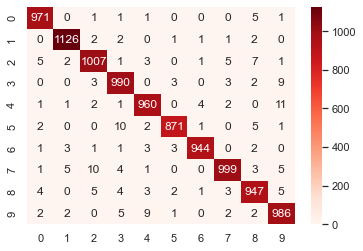

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()

**Classification Report**

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### **Plot of test data along with predicted class labels**

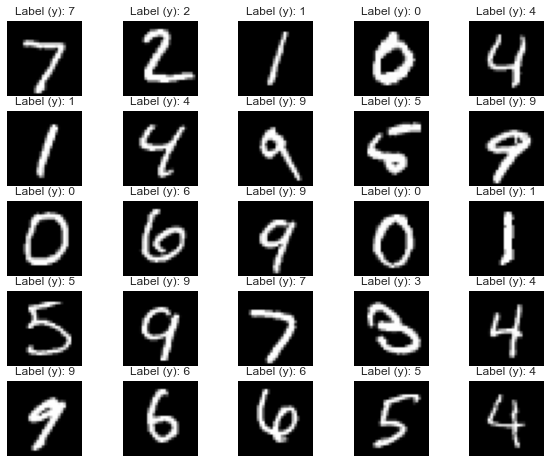

In [16]:
fig = plt.figure(figsize=(10,8))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

#### **Visualization of MLP weights in hidden layer**

* Looking at the learned coefficients of a neural network can provide insiht into the learning behaviour. 

* The input data comtains 784 features in the dataset. 

* We have used one hidden layer with 128 neurons. Therefore, weight matrix has the shape (784, 128).

* We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.

In [17]:
w = mlpc.coefs_ 
w = np.array(w[0])
w.shape 

(784, 128)

In [18]:
w1 = np.array(w[:,0])
w1.shape

(784,)

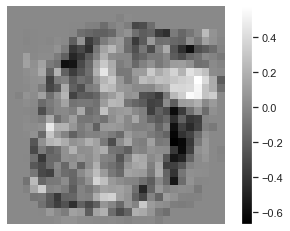

In [19]:
w_matrix = w1.reshape(28,28)
fig = plt.figure()
plt.imshow(w_matrix, cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

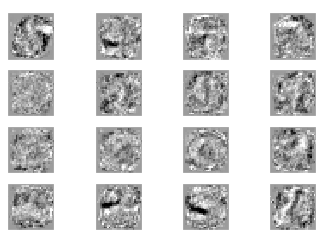

In [20]:
fig, axes = plt.subplots(4,4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()

for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

#### **Loss Curve**

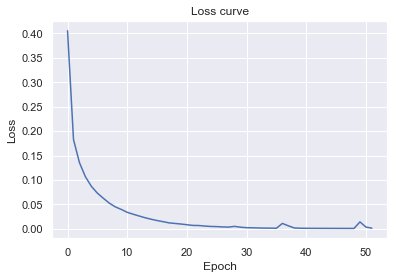

In [21]:
plt.plot(mlpc.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()